In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import linregress
from scipy.stats import linregress

In [ ]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
# for coordinate in coordinates:
#     print(coordinate[0], coordinate[1])

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [ ]:
cities_data_to_load = "weather_data/cities.csv"
city_data_df = pd.read_csv(cities_data_to_load)
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Busselton,-33.6500,115.3333,58.21,79,100,19.08,AU,2022-08-16 00:06:40
1,1,Nelson Bay,-32.7167,152.1500,60.01,68,49,10.00,AU,2022-08-16 00:06:41
2,2,Cidreira,-30.1811,-50.2056,60.93,97,79,7.20,BR,2022-08-16 00:06:41
3,3,Camacha,33.0833,-16.3333,71.02,88,40,11.50,PT,2022-08-16 00:06:42
4,4,Victoria,22.2855,114.1577,86.38,86,44,5.01,HK,2022-08-16 00:04:55


In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

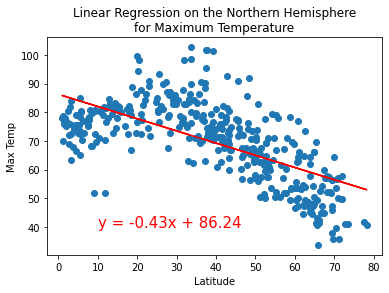

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' '\n'
                        'for Maximum Temperature', 'Max Temp',(10,40))

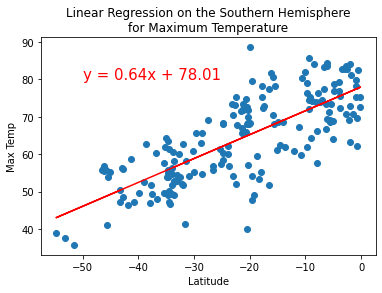

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' '\n'
                        'for Maximum Temperature', 'Max Temp',(-50,80))

The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler.

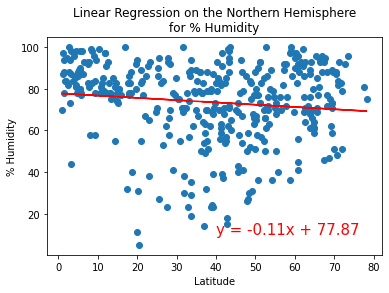

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' '\n'
                        'for % Humidity', '% Humidity',(40,10))

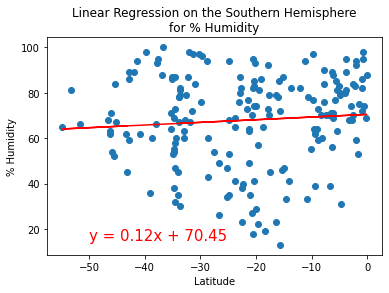

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' '\n'
                       'for % Humidity', '% Humidity',(-50,15))

The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity.

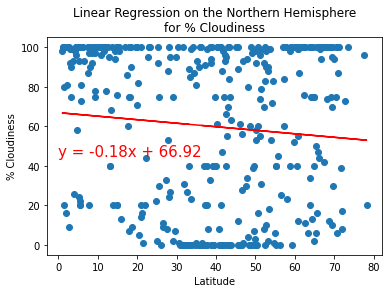

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' '\n'
                        'for % Cloudiness', '% Cloudiness',(0,45))

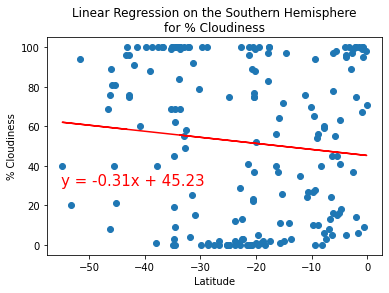

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' '\n'
                        'for % Cloudiness', '% Cloudiness',(-55,30))

The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness.

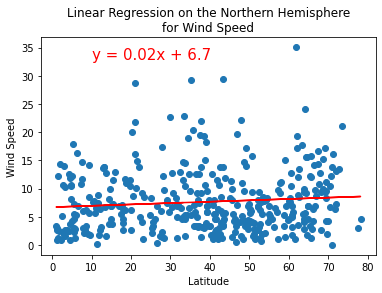

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' '\n'
                        'for Wind Speed', 'Wind Speed',(10,33))

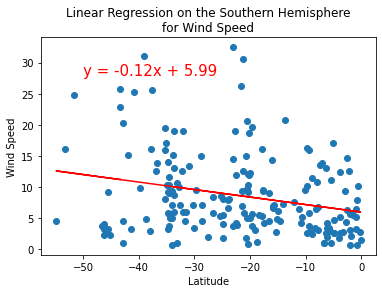

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' '\n'
                        'for Wind Speed', 'Wind Speed',(-50,28))

The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed.